# Assignment_2_EDA_and_Preprocessing

In [1]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [8]:
df = pd.read_csv("Employee.csv")

In [ ]:
#Q1.Explore the data, list down the unique values in each feature and find its length.Perform the statistical analysis and renaming of the columns.

In [9]:
print("First 5 rows:\n", df.head())
print("\nData types:\n", df.dtypes)
print("\nShape of data:", df.shape)

First 5 rows:
    Company   Age  Salary     Place Country  Gender
0      TCS  20.0     NaN   Chennai   India       0
1  Infosys  30.0     NaN    Mumbai   India       0
2      TCS  35.0  2300.0  Calcutta   India       0
3  Infosys  40.0  3000.0     Delhi   India       0
4      TCS  23.0  4000.0    Mumbai   India       0

Data types:
 Company     object
Age        float64
Salary     float64
Place       object
Country     object
Gender       int64
dtype: object

Shape of data: (148, 6)


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Company  148 non-null    object 
 1   Age      148 non-null    float64
 2   Salary   148 non-null    float64
 3   Place    148 non-null    object 
 4   Country  148 non-null    object 
 5   Gender   148 non-null    int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 7.1+ KB


In [10]:
df.head(10)

,Company,Age,Salary,Place,Country,Gender
0,TCS,20.0,NaN,Chennai,India,0
1,Infosys,30.0,NaN,Mumbai,India,0
2,TCS,35.0,2300.0,Calcutta,India,0
3,Infosys,40.0,3000.0,Delhi,India,0
4,TCS,23.0,4000.0,Mumbai,India,0
5,Infosys,NaN,5000.0,Calcutta,India,0
6,TCS,NaN,6000.0,Chennai,India,1
7,Infosys,23.0,7000.0,Mumbai,India,1
8,TCS,34.0,8000.0,Calcutta,India,1
9,CTS,45.0,9000.0,Delhi,India,0


In [14]:
print("\nUnique values in each column:")
for col in df.columns:
    unique_val = df[col].unique()
    print(f"{col} -> {unique_val} (Count: {len(unique_val)})")


Unique values in each column:
Company -> ['TCS' 'Infosys' 'CTS' nan 'Tata Consultancy Services' 'Congnizant'
 'Infosys Pvt Lmt'] (Count: 7)
Age -> [20. 30. 35. 40. 23. nan 34. 45. 18. 22. 32. 37. 50. 21. 46. 36. 26. 41.
 24. 25. 43. 19. 38. 51. 31. 44. 33. 17.  0. 54.] (Count: 30)
Salary -> [  nan 2300. 3000. 4000. 5000. 6000. 7000. 8000. 9000. 1089. 1234. 3030.
 3045. 3184. 4824. 5835. 7084. 8943. 8345. 9284. 9876. 2034. 7654. 2934.
 4034. 5034. 8202. 9024. 4345. 6544. 6543. 3234. 4324. 5435. 5555. 8787.
 3454. 5654. 5009. 5098. 3033.] (Count: 41)
Place -> ['Chennai' 'Mumbai' 'Calcutta' 'Delhi' 'Podicherry' 'Cochin' nan 'Noida'
 'Hyderabad' 'Bhopal' 'Nagpur' 'Pune'] (Count: 12)
Country -> ['India'] (Count: 1)
Gender -> [0 1] (Count: 2)


In [15]:
print("\nStatistical Summary:")
print(df.describe(include='all'))


Statistical Summary:
       Company         Age       Salary   Place Country      Gender
count      140  130.000000   124.000000     134     148  148.000000
unique       6         NaN          NaN      11       1         NaN
top        TCS         NaN          NaN  Mumbai   India         NaN
freq        53         NaN          NaN      37     148         NaN
mean       NaN   30.484615  5312.467742     NaN     NaN    0.222973
std        NaN   11.096640  2573.764683     NaN     NaN    0.417654
min        NaN    0.000000  1089.000000     NaN     NaN    0.000000
25%        NaN   22.000000  3030.000000     NaN     NaN    0.000000
50%        NaN   32.500000  5000.000000     NaN     NaN    0.000000
75%        NaN   37.750000  8000.000000     NaN     NaN    0.000000
max        NaN   54.000000  9876.000000     NaN     NaN    1.000000


In [30]:
df_renamed = df.rename(columns={'Company': 'Company name', 'Age': 'Age of Employees'})

print("\nRenamed Columns:")
print(df_renamed.columns)


Renamed Columns:
Index(['Company name', 'Age of Employees', 'Salary', 'Place', 'Country',
       'Gender'],
      dtype='object')


In [32]:
df_renamed.head(10)

,Company name,Age of Employees,Salary,Place,Country,Gender
0,TCS,20.0,NaN,Chennai,India,0
1,Infosys,30.0,NaN,Mumbai,India,0
2,TCS,35.0,2300.0,Calcutta,India,0
3,Infosys,40.0,3000.0,Delhi,India,0
4,TCS,23.0,4000.0,Mumbai,India,0
5,Infosys,NaN,5000.0,Calcutta,India,0
6,TCS,NaN,6000.0,Chennai,India,1
7,Infosys,23.0,7000.0,Mumbai,India,1
8,TCS,34.0,8000.0,Calcutta,India,1
9,CTS,45.0,9000.0,Delhi,India,0


In [33]:
#Q2. Data Cleaning
#1. Find the missing and inappropriate values, treat them appropriately.
# Checking the missing values
print("Missing values per column:\n", df.isnull().sum())

Missing values per column:
 Company     8
Age        18
Salary     24
Place      14
Country     0
Gender      0
dtype: int64


In [35]:
df['Place'].fillna('Unknown', inplace=True)
df['Company'].fillna('Unknown', inplace=True)
df['Age'].fillna(df['Age'].median(), inplace=True)

C:\Users\Neethu sethuraj\AppData\Local\Temp\ipykernel_14676\1258563117.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)


In [37]:
median_salary = df['Salary'].median()
df['Salary'].fillna(median_salary, inplace=True)

C:\Users\Neethu sethuraj\AppData\Local\Temp\ipykernel_14676\133416351.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Salary'].fillna(median_salary, inplace=True)


In [38]:
print("Missing values per column:\n", df.isnull().sum())

Missing values per column:
 Company    0
Age        0
Salary     0
Place      0
Country    0
Gender     0
dtype: int64


In [39]:
#2. Duplicate Rows
print("Duplicate rows:\n", df[df.duplicated()])

Duplicate rows:
      Company   Age  Salary     Place Country  Gender
84       CTS  43.0  5000.0    Mumbai   India       0
130      TCS  21.0  4824.0    Mumbai   India       0
131  Infosys  32.5  5835.0    Mumbai   India       0
144  Infosys  22.0  8787.0  Calcutta   India       1


In [43]:
No_Duplicates = df.drop_duplicates()
print(No_Duplicates)

             Company   Age  Salary     Place Country  Gender
0                TCS  20.0  5000.0   Chennai   India       0
1            Infosys  30.0  5000.0    Mumbai   India       0
2                TCS  35.0  2300.0  Calcutta   India       0
3            Infosys  40.0  3000.0     Delhi   India       0
4                TCS  23.0  4000.0    Mumbai   India       0
..               ...   ...     ...       ...     ...     ...
142  Infosys Pvt Lmt  22.0  8202.0    Mumbai   India       0
143              TCS  33.0  9024.0  Calcutta   India       1
145          Infosys  44.0  4034.0     Delhi   India       1
146              TCS  33.0  5034.0    Mumbai   India       1
147          Infosys  22.0  8202.0    Cochin   India       0

[144 rows x 6 columns]


In [46]:
#3. Find the outliers.
#IQR Method
Q1 = df['Salary'].quantile(0.25)
Q3 = df['Salary'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['Salary'] < lower_bound) | (df['Salary'] > upper_bound)]

print("Outliers using IQR method:\n", outliers)

Outliers using IQR method:
 Empty DataFrame
Columns: [Company, Age, Salary, Place, Country, Gender]
Index: []


In [48]:
#Z-Score method
z_scores = np.abs(stats.zscore(df['Salary']))
outliers_z = df[z_scores > 3]
print("Outliers using Z-score method:\n", outliers_z)

Outliers using Z-score method:
 Empty DataFrame
Columns: [Company, Age, Salary, Place, Country, Gender]
Index: []


In [50]:
#4. Replace the value 0 in age as NaN
df['Age'].replace(0, np.nan, inplace=True)

print("\nUpdated DataFrame with 0s in age replaced by NaN:")
print(df)


Updated DataFrame with 0s in age replaced by NaN:
     Company   Age  Salary     Place Country  Gender
0        TCS  20.0  5000.0   Chennai   India       0
1    Infosys  30.0  5000.0    Mumbai   India       0
2        TCS  35.0  2300.0  Calcutta   India       0
3    Infosys  40.0  3000.0     Delhi   India       0
4        TCS  23.0  4000.0    Mumbai   India       0
..       ...   ...     ...       ...     ...     ...
143      TCS  33.0  9024.0  Calcutta   India       1
144  Infosys  22.0  8787.0  Calcutta   India       1
145  Infosys  44.0  4034.0     Delhi   India       1
146      TCS  33.0  5034.0    Mumbai   India       1
147  Infosys  22.0  8202.0    Cochin   India       0

[148 rows x 6 columns]


C:\Users\Neethu sethuraj\AppData\Local\Temp\ipykernel_14676\3136755103.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].replace(0, np.nan, inplace=True)


In [51]:
#5. Treat the null values in all columns using any measures(removing/ replace the values with mean/median/mode)
df.fillna(df.median(numeric_only=True), inplace=True)

In [52]:
for col in df.select_dtypes(include='object'):
    df[col].fillna(df[col].mode()[0], inplace=True)

print("\nSimple cleaned DataFrame:")
print(df)


Simple cleaned DataFrame:
     Company   Age  Salary     Place Country  Gender
0        TCS  20.0  5000.0   Chennai   India       0
1    Infosys  30.0  5000.0    Mumbai   India       0
2        TCS  35.0  2300.0  Calcutta   India       0
3    Infosys  40.0  3000.0     Delhi   India       0
4        TCS  23.0  4000.0    Mumbai   India       0
..       ...   ...     ...       ...     ...     ...
143      TCS  33.0  9024.0  Calcutta   India       1
144  Infosys  22.0  8787.0  Calcutta   India       1
145  Infosys  44.0  4034.0     Delhi   India       1
146      TCS  33.0  5034.0    Mumbai   India       1
147  Infosys  22.0  8202.0    Cochin   India       0

[148 rows x 6 columns]


C:\Users\Neethu sethuraj\AppData\Local\Temp\ipykernel_14676\2364201280.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)


In [54]:
#Q3. Data Analysis
#1. Filter the data with age >40 and salary<5000
filtered_df = df[(df['Age'] > 40) & (df['Salary'] < 5000)]
print("\nFiltered Data (Age > 40 and Salary < 5000):")
print(filtered_df)


Filtered Data (Age > 40 and Salary < 5000):
     Company   Age  Salary      Place Country  Gender
21   Infosys  50.0  3184.0      Delhi   India       0
32   Infosys  45.0  4034.0   Calcutta   India       0
39   Infosys  41.0  3000.0     Mumbai   India       0
50   Infosys  41.0  3000.0    Chennai   India       0
57   Infosys  51.0  3184.0  Hyderabad   India       0
68   Infosys  43.0  4034.0     Mumbai   India       0
75   Infosys  44.0  3000.0     Cochin   India       0
86   Infosys  41.0  3000.0      Delhi   India       0
93   Infosys  54.0  3184.0     Mumbai   India       0
104  Infosys  44.0  4034.0      Delhi   India       0
122  Infosys  44.0  3234.0     Mumbai   India       0
129  Infosys  50.0  3184.0   Calcutta   India       0
138      CTS  44.0  3033.0     Cochin   India       0
140  Infosys  44.0  4034.0  Hyderabad   India       0
145  Infosys  44.0  4034.0      Delhi   India       1


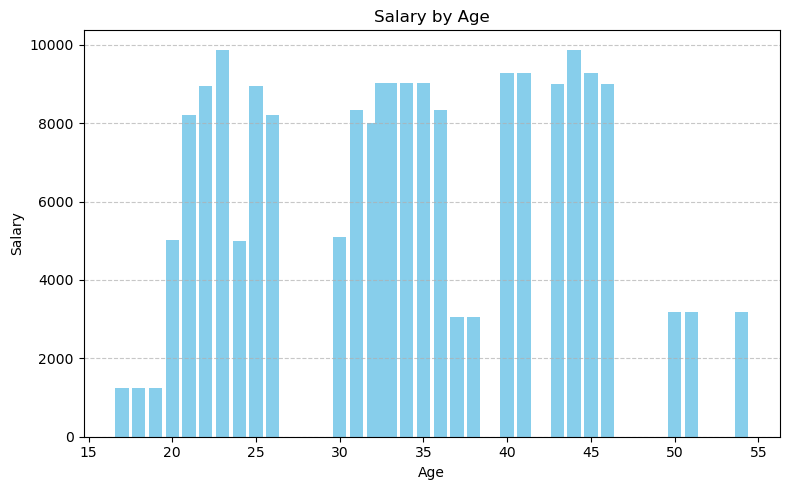

In [63]:
#2. Plot the chart with age and salary
plt.figure(figsize=(8, 5))
plt.bar(df['Age'], df['Salary'], color='skyblue')
plt.title('Salary by Age')
plt.xlabel('Age')
plt.ylabel('Salary')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [66]:
#3. Count the number of people from each place and represent it visually
place_counts = df['Place'].value_counts()
place_counts

Place
Mumbai        37
Calcutta      33
Chennai       14
Delhi         14
Unknown       14
Cochin        13
Noida          8
Hyderabad      8
Podicherry     3
Pune           2
Bhopal         1
Nagpur         1
Name: count, dtype: int64

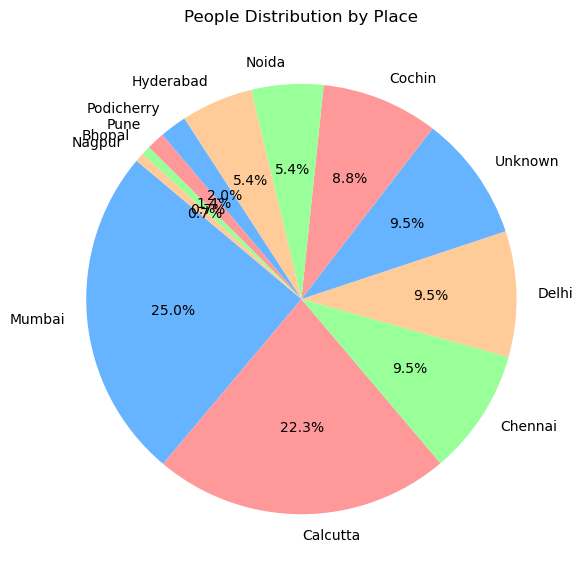

In [67]:
place_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140, figsize=(6,6), colors=['#66b3ff','#ff9999','#99ff99','#ffcc99'])
plt.title('People Distribution by Place')
plt.ylabel('')
plt.tight_layout()
plt.show()

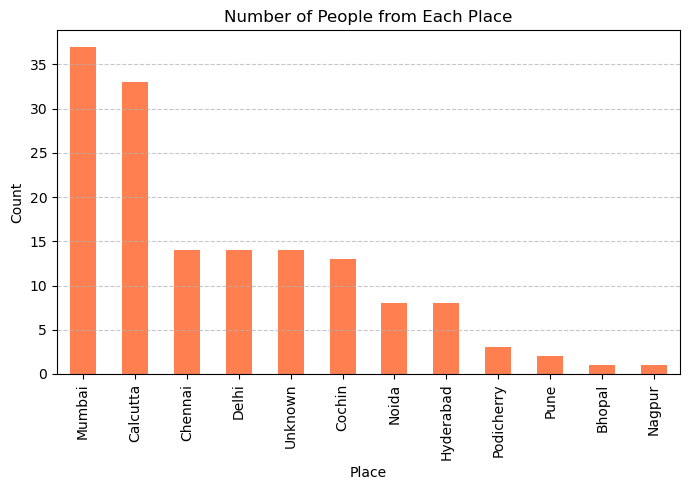

In [69]:
# Bar Chart
plt.figure(figsize=(7, 5))
place_counts.plot(kind='bar', color='coral')
plt.title('Number of People from Each Place')
plt.xlabel('Place')
plt.ylabel('Count')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [77]:
#Q4. Data Encoding
#  Label Encoding (for gender) 
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Gender_encoded'] = le.fit_transform(df['Gender'])
df['Gender_encoded']

0      0
1      0
2      0
3      0
4      0
      ..
143    1
144    1
145    1
146    1
147    0
Name: Gender_encoded, Length: 148, dtype: int64

In [78]:
#  One-Hot Encoding (for place) 
df_encoded = pd.get_dummies(df, columns=['Place'], prefix='place')

print("\nEncoded DataFrame:")
print(df_encoded)


Encoded DataFrame:
     Company   Age  Salary Country  Gender  Gender_encoded  place_Bhopal  \
0        TCS  20.0  5000.0   India       0               0         False   
1    Infosys  30.0  5000.0   India       0               0         False   
2        TCS  35.0  2300.0   India       0               0         False   
3    Infosys  40.0  3000.0   India       0               0         False   
4        TCS  23.0  4000.0   India       0               0         False   
..       ...   ...     ...     ...     ...             ...           ...   
143      TCS  33.0  9024.0   India       1               1         False   
144  Infosys  22.0  8787.0   India       1               1         False   
145  Infosys  44.0  4034.0   India       1               1         False   
146      TCS  33.0  5034.0   India       1               1         False   
147  Infosys  22.0  8202.0   India       0               0         False   

     place_Calcutta  place_Chennai  place_Cochin  place_Delhi  \
0 

In [89]:
#Q5. Feature Scaling
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
df_encoded = df.drop(['Company', 'Gender', 'Place', 'Country'], axis=1)
scaler_standard = StandardScaler()
scaler_minmax = MinMaxScaler()

# Apply StandardScaler
standard_scaled = pd.DataFrame(
    scaler_standard.fit_transform(df_encoded),
    columns=[f"{col}_std" for col in df_encoded.columns]
)

# Apply MinMaxScaler
minmax_scaled = pd.DataFrame(
    scaler_minmax.fit_transform(df_encoded),
    columns=[f"{col}_minmax" for col in df_encoded.columns]
)

In [90]:
standard_scaled

,Age_std,Salary_std,Gender_encoded_std
0,-1.462355,-0.111443,-0.535683
1,-0.248510,-0.111443,-0.535683
2,0.358412,-1.260788,-0.535683
3,0.965334,-0.962810,-0.535683
4,-1.098201,-0.537126,-0.535683
...,...,...,...
143,0.115643,1.601508,1.866775
144,-1.219586,1.500621,1.866775
145,1.450872,-0.522653,1.866775
146,0.115643,-0.096970,1.866775


In [91]:
minmax_scaled

,Age_minmax,Salary_minmax,Gender_encoded_minmax
0,0.081081,0.445089,0.0
1,0.351351,0.445089,0.0
2,0.486486,0.137817,0.0
3,0.621622,0.217480,0.0
4,0.162162,0.331285,0.0
...,...,...,...
143,0.432432,0.903039,1.0
144,0.135135,0.876067,1.0
145,0.729730,0.335154,1.0
146,0.432432,0.448959,1.0


In [86]:
scaled_df = pd.concat([standard_scaled, minmax_scaled], axis=1)

print("\nScaled Data (Standard & MinMax):")
print(scaled_df)


Scaled Data (Standard & MinMax):
      Age_std  Salary_std  Gender_encoded_std  Age_minmax  Salary_minmax  \
0   -1.462355   -0.111443           -0.535683    0.081081       0.445089   
1   -0.248510   -0.111443           -0.535683    0.351351       0.445089   
2    0.358412   -1.260788           -0.535683    0.486486       0.137817   
3    0.965334   -0.962810           -0.535683    0.621622       0.217480   
4   -1.098201   -0.537126           -0.535683    0.162162       0.331285   
..        ...         ...                 ...         ...            ...   
143  0.115643    1.601508            1.866775    0.432432       0.903039   
144 -1.219586    1.500621            1.866775    0.135135       0.876067   
145  1.450872   -0.522653            1.866775    0.729730       0.335154   
146  0.115643   -0.096970            1.866775    0.432432       0.448959   
147 -1.219586    1.251596           -0.535683    0.135135       0.809491   

     Gender_encoded_minmax  
0                      0